In [43]:
#asdasd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

netflix_data1 = pd.read_csv("netflix.csv")
netflix_data2 = pd.read_csv("netflix2.csv")
prime_data = pd.read_csv("prime.csv")
amazon_data = pd.read_csv("amazon.csv", encoding= 'unicode_escape')


In [44]:
netflix_data1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [45]:
netflix_data2.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [46]:
prime_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [47]:
amazon_data.head()

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+


In [48]:
print(netflix_data1.columns)
print(netflix_data2.columns)
print(prime_data.columns)
print(amazon_data.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Index(['title', 'year', 'certificate', 'duration', 'genre', 'rating',
       'description', 'stars', 'votes'],
      dtype='object')
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Index(['S.no.', 'Name of the show', 'Year of release',
       'No of seasons available', 'Language', 'Genre', 'IMDb rating',
       'Age of viewers'],
      dtype='object')


In [49]:
# chance listed_in columns name to genre
prime_data = prime_data.drop(['description', 'date_added','show_id','rating'], axis=1)
prime_data.rename(columns={'listed_in':'Genre'}, inplace=True)
prime_data = prime_data.dropna(subset=['cast', 'director'])
prime_data.head()

,type,title,director,cast,country,release_year,duration,Genre
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2014,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2018,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2017,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2014,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,1989,45 min,"Drama, Fantasy"


In [50]:
amazon_data = amazon_data.dropna(subset=['Name of the show', 'IMDb rating'])
amazon_data['No of seasons available'] = amazon_data['No of seasons available'].astype('int64')
amazon_data['Year of release'] = amazon_data['Year of release'].astype('int64')
amazon_data = amazon_data.drop(['S.no.'], axis=1)
amazon_data.rename(columns={'No of seasons available':'seasons'}, inplace=True)
amazon_data.rename(columns={'Name of the show':'title'}, inplace=True)
amazon_data.rename(columns={'Year of release':'release_year'}, inplace=True)
amazon_data.rename(columns={'IMDb rating':'IMDB'}, inplace=True)


In [51]:
amazon_data.head()

,title,release_year,seasons,Language,Genre,IMDB,Age of viewers
0,Pataal Lok,2020,1,Hindi,Drama,7.5,18+
1,Upload,2020,1,English,Sci-fi comedy,8.1,16+
2,The Marvelous Mrs. Maisel,2017,3,English,"Drama, Comedy",8.7,16+
3,Four More Shots Please,2019,2,Hindi,"Drama, Comedy",5.3,18+
4,Fleabag,2016,2,English,Comedy,8.7,18+


In [52]:
#delete null values if country and cast is null
netflix_data1 = netflix_data1.dropna(subset=['country', 'cast', 'director','duration'])
#delete columns  show_id, date_added, rating, description
netflix_data1 = netflix_data1.drop(['show_id', 'date_added', 'rating', 'description'], axis=1)
#chance listed_in columns name to genre
netflix_data1.rename(columns={'listed_in':'Genre'}, inplace=True)
netflix_data1.head()

,type,title,director,cast,country,release_year,duration,Genre
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,125 min,"Dramas, Independent Movies, International Movies"
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,9 Seasons,"British TV Shows, Reality TV"
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,104 min,"Comedies, Dramas"
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,127 min,"Dramas, International Movies"
24,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,166 min,"Comedies, International Movies, Romantic Movies"


In [53]:
#delete if duration is null
netflix_data2 = netflix_data2.dropna(subset=['duration','rating','genre'])
#delete columns  description and certificate
netflix_data2 = netflix_data2.drop(['description', 'certificate'], axis=1)
#chance stars columns name to cast and rating to IMDB 
netflix_data2.rename(columns={'stars':'cast'}, inplace=True)
netflix_data2.rename(columns={'rating':'IMDB'}, inplace=True)
netflix_data2.head()

,title,year,duration,genre,IMDB,cast,votes
0,Cobra Kai,(2018– ),30 min,"Action, Comedy, Drama",8.5,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),58 min,"Biography, Drama, History",8.7,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),46 min,"Crime, Drama",8.9,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),356 min,"Drama, Horror, Mystery",5.9,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),24 min,"Animation, Action, Adventure",8.6,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


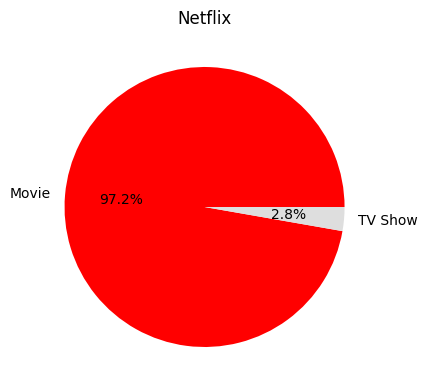

In [54]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Netflix')
plt.pie(netflix_data1['type'].value_counts(), labels=netflix_data1['type'].value_counts().index, autopct='%1.1f%%' ,colors=['#ff0000', '#dedede'])
plt.show()


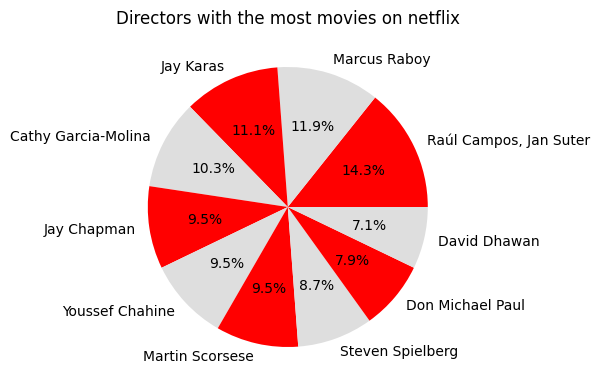

In [55]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Directors with the most movies on netflix')
plt.pie(netflix_data1['director'].value_counts().head(10), labels=netflix_data1['director'].value_counts().head(10).index, autopct='%1.1f%%' ,colors=['#ff0000', '#dedede'])
plt.show()


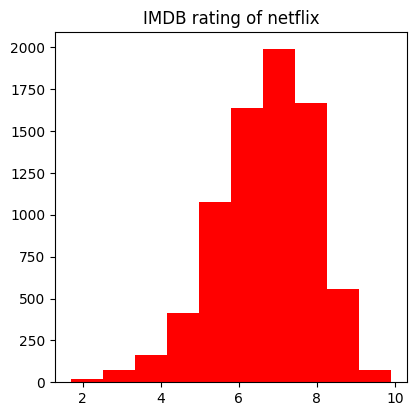

In [56]:
#show imdb rating of netflix_data2 in histogram  x axis is imdb rating and y axis is number of movies
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('IMDB rating of netflix')
plt.hist(netflix_data2['IMDB'], bins=10, color='#ff0000')
plt.show()



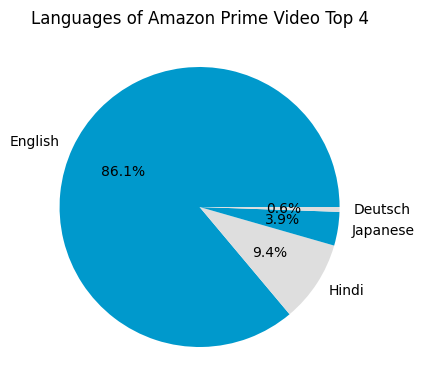

In [57]:
#show language of amazon_data in pie chart top 4 languages
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Languages of Amazon Prime Video Top 4')
plt.pie(amazon_data['Language'].value_counts().head(4), labels=amazon_data['Language'].value_counts().head(4).index, autopct='%1.1f%%' ,colors=['#0099CC', '#dedede'])
plt.show()


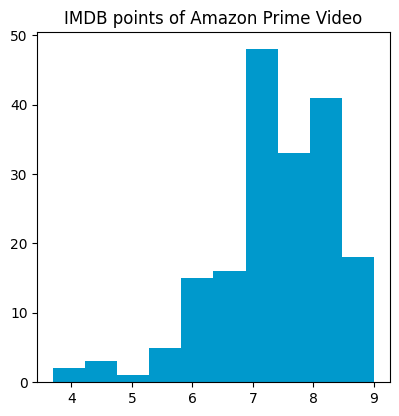

In [58]:
#show Imdb points of amazon_data 
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('IMDB points of Amazon Prime Video')
plt.hist(amazon_data['IMDB'], bins=10, color='#0099CC')
plt.show()


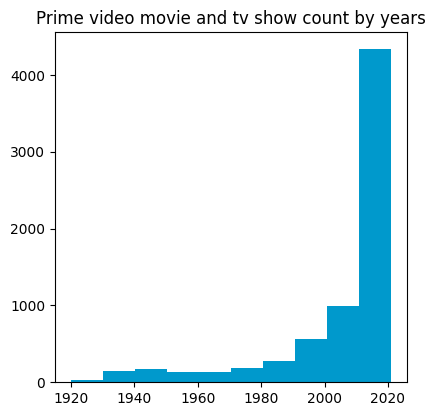

In [59]:
#show realase year of prime_data in histogram
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Prime video movie and tv show count by years')
plt.hist(prime_data['release_year'], bins=10, color='#0099CC')
plt.show()


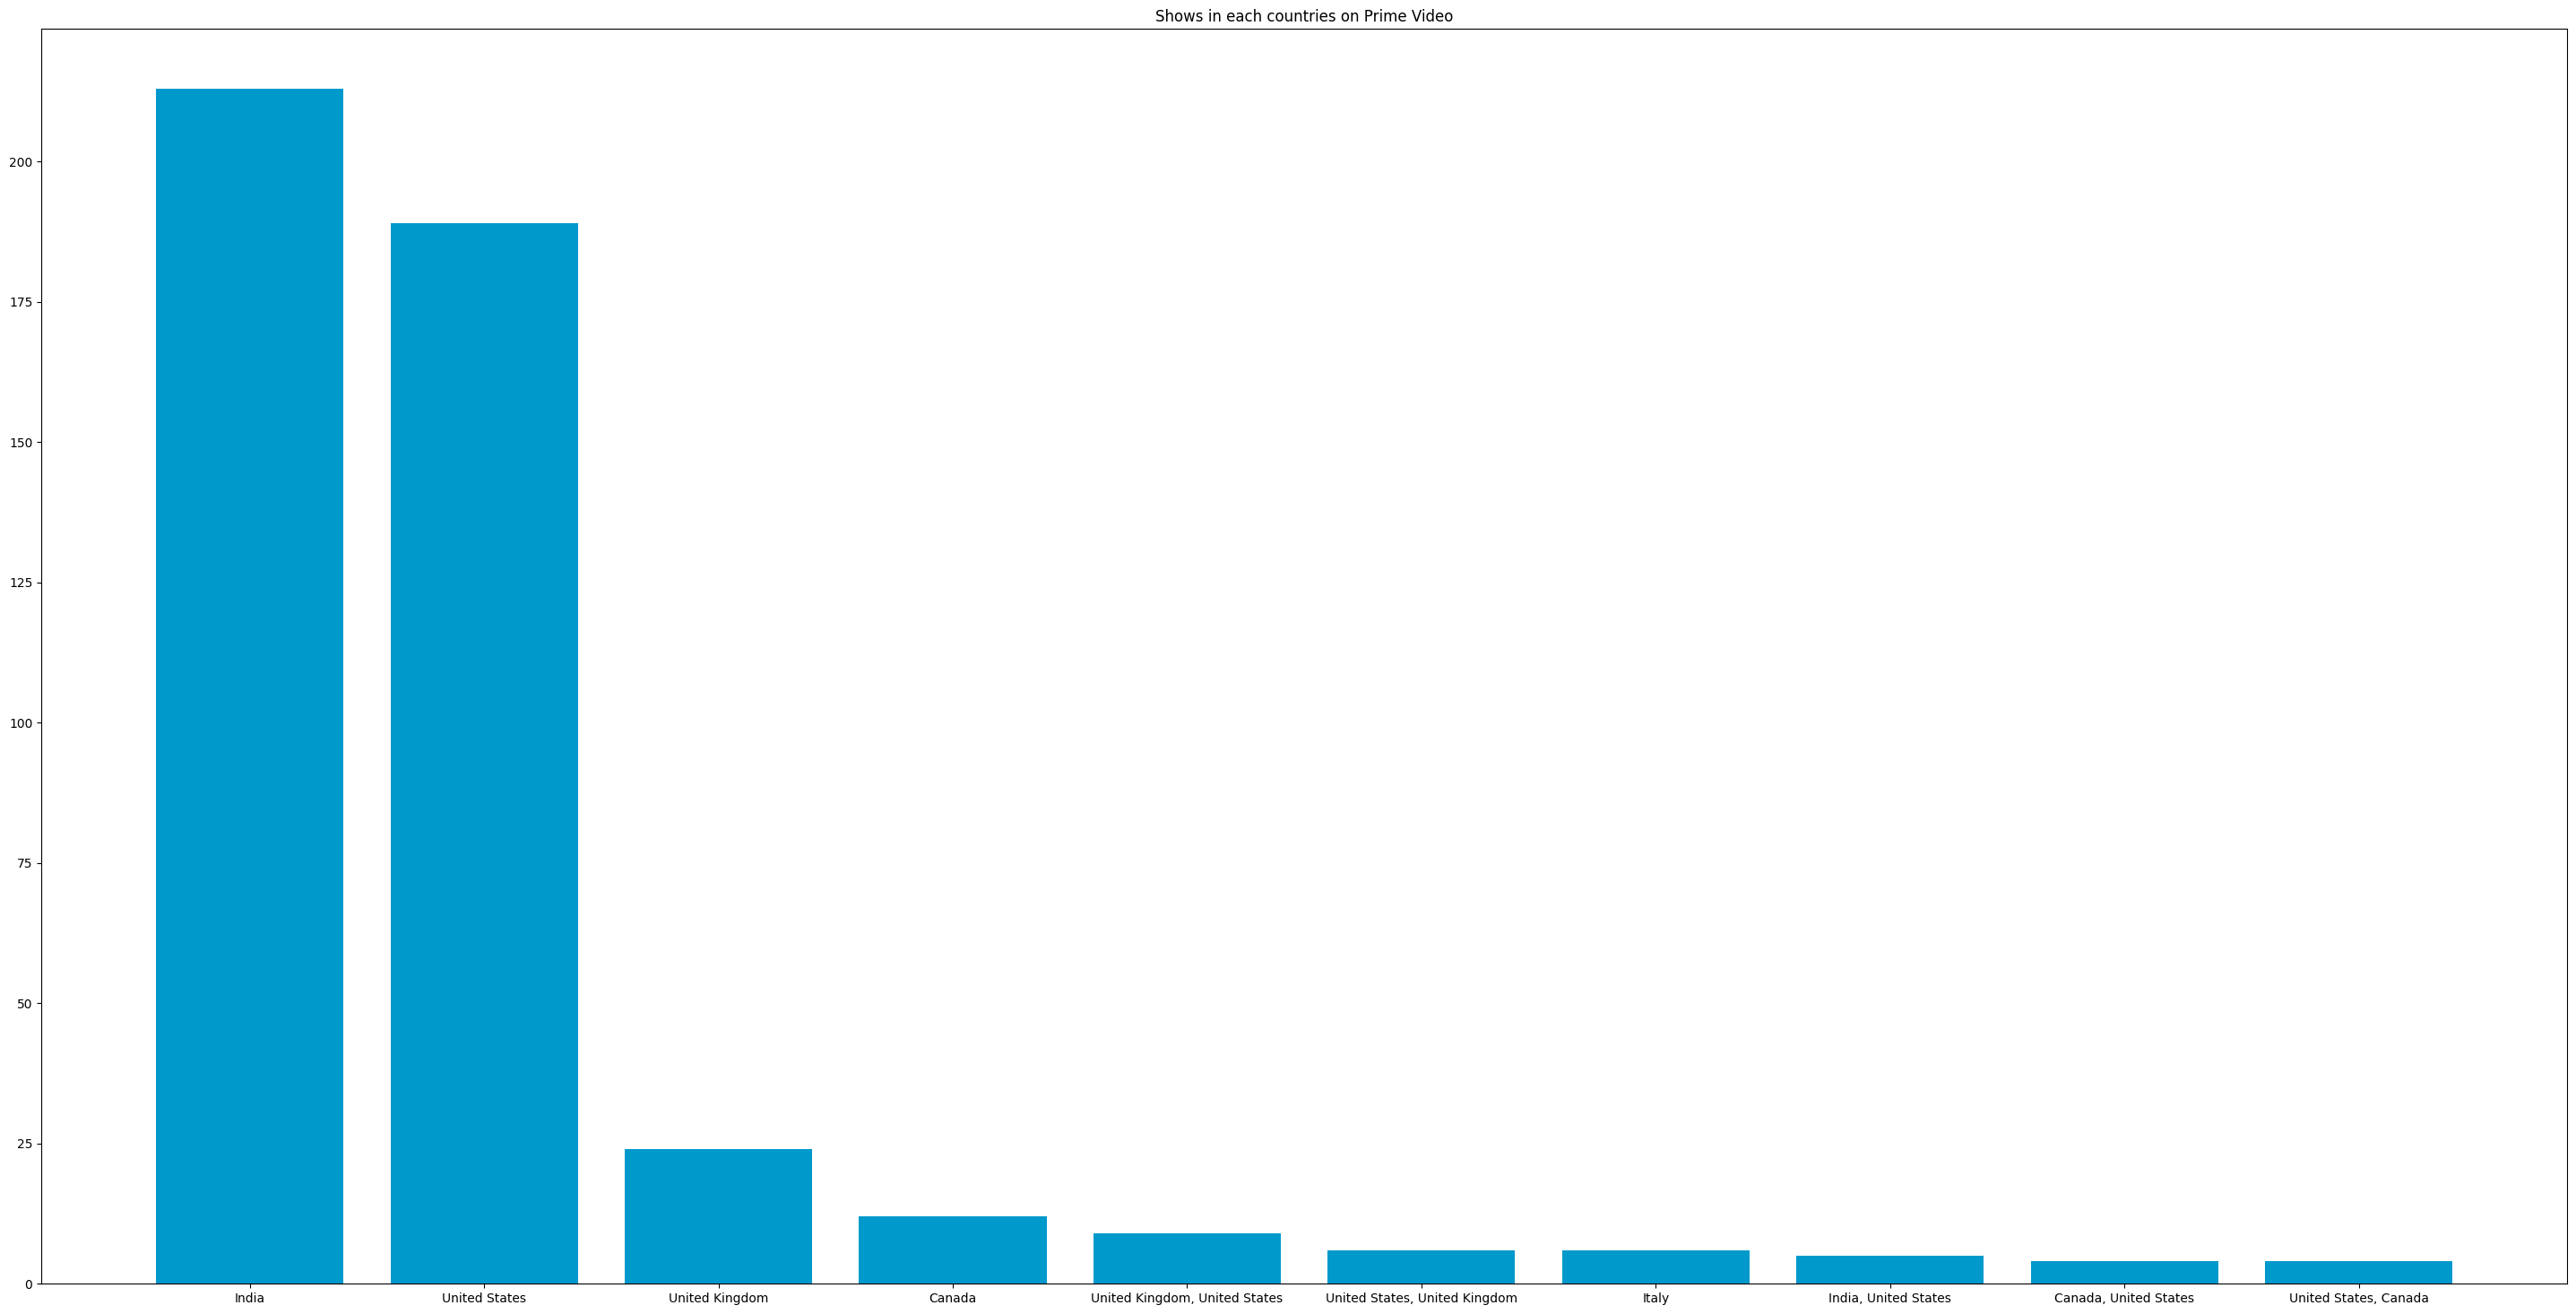

In [60]:
#showed how many show in each countries on prime_data in bar chart
plt.figure(figsize=(80,40))
plt.subplot(2,2,1)
plt.title('Shows in each countries on Prime Video')
plt.bar(prime_data['country'].value_counts().head(10).index, prime_data['country'].value_counts().head(10), color='#0099CC')
plt.show()





In [61]:
# calculated the all genres in netflix_data1
genres = []
for i in netflix_data1['Genre']:
    genres.extend(i.split(','))
genres = pd.Series(genres)
genres = genres.value_counts()


In [62]:
# created new array named netflix_data1_genres and add extra columns based on genres data
netflix_data1_genres = netflix_data1.copy()
for i in genres.index:
    netflix_data1_genres[i] = netflix_data1_genres['Genre'].str.contains(i).apply(lambda x: 1 if x else 0)
netflix_data1_genres.head()

,type,title,director,cast,country,release_year,duration,Genre,International Movies,Dramas,...,TV Action & Adventure,Reality TV,Classic & Cult TV,LGBTQ Movies,Classic & Cult TV,Reality TV,TV Dramas,Romantic TV Shows,TV Horror,Science & Nature TV
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,125 min,"Dramas, Independent Movies, International Movies",1,1,...,0,0,0,0,0,0,0,0,0,0
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,9 Seasons,"British TV Shows, Reality TV",0,0,...,0,1,0,0,0,1,0,0,0,0
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,104 min,"Comedies, Dramas",0,1,...,0,0,0,0,0,0,0,0,0,0
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,127 min,"Dramas, International Movies",1,1,...,0,0,0,0,0,0,0,0,0,0
24,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,166 min,"Comedies, International Movies, Romantic Movies",1,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# calculated the all genres in netflix_data1
countries = []
for i in netflix_data1['country']:
    countries.extend(i.split(','))
countries = pd.Series(countries)
countries = countries.value_counts()

In [64]:
# created new array named netflix_data1_genres and add extra columns based on genres data
netflix_data1_countries = netflix_data1.copy()
for i in countries.index:
    netflix_data1_countries[i] = netflix_data1_countries['country'].str.contains(i).apply(lambda x: 1 if x else 0)
netflix_data1_countries.head()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_6492\2215641269.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  netflix_data1_countries[i] = netflix_data1_countries['country'].str.contains(i).apply(lambda x: 1 if x else 0)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_6492\2215641269.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  netflix_data1_countries[i] = netflix_data1_countries['country'].str.contains(i).apply(lambda x: 1 if x else 0)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_6492\2215641269.py:4: PerformanceWarning: Da

,type,title,director,cast,country,release_year,duration,Genre,United States,India,...,Mauritius,Soviet Union,Syria,Georgia,Syria,Slovakia,Bermuda,Ecuador,Iran,Montenegro
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,125 min,"Dramas, Independent Movies, International Movies",1,0,...,0,0,0,0,0,0,0,0,0,0
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,9 Seasons,"British TV Shows, Reality TV",0,0,...,0,0,0,0,0,0,0,0,0,0
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,104 min,"Comedies, Dramas",1,0,...,0,0,0,0,0,0,0,0,0,0
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,127 min,"Dramas, International Movies",0,0,...,0,0,0,0,0,0,0,0,0,0
24,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,166 min,"Comedies, International Movies, Romantic Movies",0,1,...,0,0,0,0,0,0,0,0,0,0


In [65]:
netflix_data1_genres = netflix_data1_genres[netflix_data1_genres['type']== 'Movie']
netflix_data1_genres['duration'] = netflix_data1_genres['duration'].str.replace(' min' , '')  
netflix_data1_genres['duration'] = netflix_data1_genres['duration'].astype(int)

In [66]:
netflix_data1_countries = netflix_data1_countries[netflix_data1_countries['type'] == 'Movie']
netflix_data1_countries['duration'] = netflix_data1_countries['duration'].str.replace(' min' , '')  
netflix_data1_countries['duration'] = netflix_data1_countries['duration'].astype(int)

In [67]:
netflix_data1_countries

,type,title,director,cast,country,release_year,duration,Genre,United States,India,...,Mauritius,Soviet Union,Syria,Georgia,Syria,Slovakia,Bermuda,Ecuador,Iran,Montenegro
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,125,"Dramas, Independent Movies, International Movies",1,0,...,0,0,0,0,0,0,0,0,0,0
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,104,"Comedies, Dramas",1,0,...,0,0,0,0,0,0,0,0,0,0
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,127,"Dramas, International Movies",0,0,...,0,0,0,0,0,0,0,0,0,0
24,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,166,"Comedies, International Movies, Romantic Movies",0,1,...,0,0,0,0,0,0,0,0,0,0
27,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2010,103,Comedies,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2015,96,"Dramas, International Movies, Thrillers",0,0,...,0,0,0,0,0,0,0,0,0,0
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,158,"Cult Movies, Dramas, Thrillers",1,0,...,0,0,0,0,0,0,0,0,0,0
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,88,"Comedies, Horror Movies",1,0,...,0,0,0,0,0,0,0,0,0,0
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,88,"Children & Family Movies, Comedies",1,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
netflix_data1_genres


,type,title,director,cast,country,release_year,duration,Genre,International Movies,Dramas,...,TV Action & Adventure,Reality TV,Classic & Cult TV,LGBTQ Movies,Classic & Cult TV,Reality TV,TV Dramas,Romantic TV Shows,TV Horror,Science & Nature TV
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,125,"Dramas, Independent Movies, International Movies",1,1,...,0,0,0,0,0,0,0,0,0,0
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,104,"Comedies, Dramas",0,1,...,0,0,0,0,0,0,0,0,0,0
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,127,"Dramas, International Movies",1,1,...,0,0,0,0,0,0,0,0,0,0
24,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,166,"Comedies, International Movies, Romantic Movies",1,0,...,0,0,0,0,0,0,0,0,0,0
27,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2010,103,Comedies,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2015,96,"Dramas, International Movies, Thrillers",1,1,...,0,0,0,0,0,0,0,0,0,0
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,158,"Cult Movies, Dramas, Thrillers",0,1,...,0,0,0,0,0,0,0,0,0,0
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,88,"Comedies, Horror Movies",0,0,...,0,0,0,0,0,0,0,0,0,0
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,88,"Children & Family Movies, Comedies",0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
#make together netflix_data1 and netflix_data2 only same titles
netflix_data = pd.merge(netflix_data1, netflix_data2, on='title', how='inner')
#delete cast_y , year and duration_y columns
netflix_data = netflix_data.drop(['cast_y', 'year', 'duration_y', 'Genre'], axis=1)
#make duration_x columns name to duration and cast_x to cast
netflix_data.rename(columns={'duration_x':'duration'}, inplace=True)
netflix_data.rename(columns={'cast_x':'cast'}, inplace=True)
netflix_data.head()



,type,title,director,cast,country,release_year,duration,Genre,genre,IMDB,votes
0,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,125 min,"Dramas, Independent Movies, International Movies",Drama,7.0,710
1,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,104 min,"Comedies, Dramas","Comedy, Drama",6.3,"13,097"
2,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,127 min,"Dramas, International Movies","Drama, Romance, Thriller",5.5,"1,177"
3,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,1975,124 min,"Action & Adventure, Classic Movies, Dramas","Adventure, Thriller",8.1,"600,404"
4,Movie,Jaws 2,Jeannot Szwarc,"Roy Scheider, Lorraine Gary, Murray Hamilton, ...",United States,1978,116 min,"Dramas, Horror Movies, Thrillers","Adventure, Horror, Thriller",5.8,"78,737"


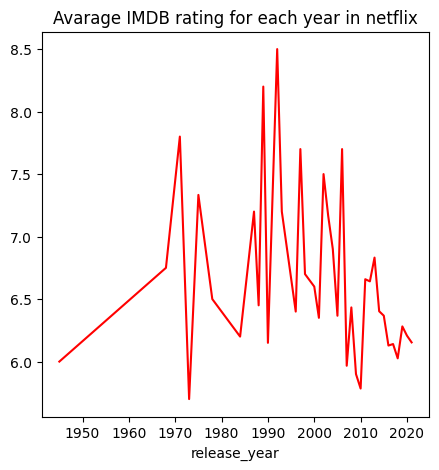

In [80]:
# avarage imdb rating for each year in netflix_data
netflix_data.groupby('release_year')['IMDB'].mean().plot(kind='line', figsize=(5,5), color='#ff0000')
plt.title('Avarage IMDB rating for each year in netflix')
plt.show()
